# Titanic - Apprentissage supervisé - classification

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="450" />

Le RMS Titanic est un paquebot transatlantique britannique qui fait naufrage dans l'océan Atlantique Nord en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton (Angleterre) à New York (Etats-Unis d'Amérique). Entre 1 490 et 1 520 personnes trouvent la mort, ce qui fait de cet événement l'une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l'époque.
- [source wikipedia](https://fr.wikipedia.org/wiki/Titanic)

Le jeu de données (ou dataset) du Titanic est un peu le hello world pour l'apprentissage supervisé, le but est de trouver si les personnes présentent dans le fichier de données non-labellisées (test_data.csv) auraient survécu ou non lors du nauvrage de "l'insubmersible".
Le résultat étant représenté par une donnée discrète (Survie ou non), deux classes distinctes, nous allons utiliser un algorithme de classification, voici une liste non exhaustive d'algorithmes de classification, donc d'apprentissage supervisés :
- L'arbre décisionnel (Decision Tree)
- Forêt d'arbres décisionnels (Random Forest)
- Régression Logistique (Logistic Regression)

Mis à part l'arbre décisionnel, il n'y pas de méthodes meilleures qu'une autre, disons plutôt qu'il y en a une plus adaptée qu'une autre.

# L'arbre décisionnel (Decision Tree)

Le principe de l'arbre de décision est très simple : on parcourt un ensemble de décisions et on parcourt l'arbre jusqu'à arriver à la solution.
![schéma arbre décisionnel](../_images/decision-tree.png)
Voici un exemple d'arbre décisionnel concernant le jeu de données du Titanic. Vous remarquerez qu'un arbre de décision est très facile à lire, même sans avoir de connaissances en informatique / mathématiques.

Pour rappel, nous partons d'un dataset comme celui ci-dessous et on essaye d'obtenir un arbre de décision.

![schéma arbre décisionnel](../_images/dataset-to-tree.jpg)


Grâce à l'algorithme d'arbre décisionnel, nous n'avons qu'à désigner les caractéristiques (features) qui vont servir à prendre les décisions, le nombre d'embranchements (questions), et le reste sera fait tout seul. L'algorithme cherchant à trouver les questions les plus pertinentes, pour arriver à la réponse finale, dans notre cas il s'agit de la survie d'un passager du Titanic.

Le problème de cette méthode, c'est quelle est très instable concernant les résultats, étant donné qu'il n'y a qu'un seul et unique test, un arbre parcouru autrement dit, notre modèle peut être fortement soumis au surapprentissage (overfitting). Ce qui fait que lors de la phase de test sur données non-labellisées, le résultat sera aléatoire. Et en ML, on essaye le plus possible de limiter la variance des résultats. C'est là qu'entre en jeu l'algorithme de forêt d'arbres décisionnels (Random Forest).

# Forêt d'arbres décisionnels (Random Forest)

L'algorithme de forêt d'arbres décisionnels reprend le même principe que l'algorithme d'arbre décisionnel à la différence près que la forêt d'arbres décisionnels **va multiplier le nombre d'arbres,** le nombre de questions (enbranchements) resteront les mêmes, en revanche les questions posées, elles changeront aussi bien au niveau de l'ordre que leur contenu, ceci limite donc les risques de surapprentissage étant donné que notre modèle ne voit pas la même chose à chaque fois. On en déduit donc que plus il y a d'arbres dans notre forêt, moins notre modèle sera soumis au surentraînement. Néanmoins, effectuer un million d'arbres n'a pas vraiment d'intérêt.

![schéma arbre décisionnel](../_images/decision-tree-vs-random-forest.png)

A la fin, notre algorithme va définir un seul et unique arbre basé sur les résultats des différents arbres.

- [Différence arbre décisionnel et Forêt d'arbres décisionnels - anglais](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.


```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Charger des fichiers distants (depuis un serveur)

La classe `request` de Python permet d'effectuer des requêtes serveur, on peut l'utiliser de la façon suivante pour **télécharger** un fichier distant.

```python
request.urlretrieve ("lien-du-fichier", "reference-locale-du-fichier")
df = pd.read_csv("reference-locale-du-fichier")
```

# Pratiquons !

Maintenant que nous avons vu deux algorithmes de classification, nous pouvons nous essayer à l'apprentissage supervisé avec les données des passagers du RMS Titanic. Et comme d'habitude, on commence par... 

# à-vous-de-remplacer-le-titre

In [10]:
# Vu qu'on va manipuler des dataframes, on n'oublie pas d'importer "pandas" et "numpy"
import numpy as np
import pandas as pd

# Ensuite on charge nos données
# train.csv va nous servir à entraîner notre modèle
# test_data.csv nous servira après pour valider notre modèle en utilisant des donnes non-labellisées
entrainement_df = pd.read_csv("train_data.csv")
display(entrainement_df.head())

test_df = pd.read_csv("test_data.csv")
# Faire la même chose avec le fichier de test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Explication des noms des colonnes
Liste non-exhaustive
- PassengerId : Identifiant unique du passager
- Survived : 0 = Décès, 1 = En vie
- Pclass : La classe de voyage (1 = 1ere classe, 2 = 2ème classe, 3 = 3ème classe)
- Name : Le nom du passager
- Sex : Le sexe du passager
- Age : L’age du passager
- SibSp (Siblings / Spouses) : Le nombre de frères et soeurs ou époux / épouses à bord
- Parch (Parents / Children) : Le nombre de parents ou enfants à bord
- Ticket : Le numéro du billet de voyage
- Fare : Le prix du billet de voyage
- Cabin : Le numéro de la cabine
- Lifeboat : Identifiant du canot de sauvetage
- Destination : Lieu de destination du Passager
- Body : identifiant du corps
- Embarked : Lieu d’embarquement du passager (C = Cherbourg, S = Southampton, Q = Queenstown)

Essayons de répondre aux questions suivantes, ceci nous permettra de mieux comprendre notre jeu de données  :
- Combien il y avait de femmes / hommes ?
- Quel est le ratio de femmes / hommes survivants ?
- Quel est l'âge moyen des passagers ?
- Quel est la femme survivante la plus âgée ? (ligne)
- Quel est l'âge de l'homme survivant le plus jeune ? (valeur)

# A vous de coder

A partir du DataFrame d'entraînement (train_data.csv), répondre aux questions précédentes. N'oubliez pas la fonction `display()` pour afficher les résultats.

In [11]:
# Combien il y avait de femmes ?
nbr_femmes = len(entrainement_df[entrainement_df.Sex == "female"])
display(f"Il y avait {nbr_femmes} femmes sur le Titanic")

'Il y avait 314 femmes sur le Titanic'

### f-strings

Vous remarquerez que dans notre cellule précédente, nous avons un "f" qui préfixe notre chaîne de caractères. Cette lettre est très importante, c'est la syntaxe d'une "f-strings", ceci pourrait se traduire en "chaîne de caractères formattées". Grâce aux f-strings, il nous est possible de subsituer une variable par sa valeur dans une chaîne de caractère.

```python
nom_cours = "Big Data et Open Data"

print(f'Je suis en cours de {nom_cours}')
```
"Je suis en cours de Big Data et Open Data" sera affiché dans la cellule de sortie.

Notez que les f-strings fonctionnent aussi bien avec les guillemets simples (') et doubles (").

- [Plus d'infos sur f-strings](https://he-arc.github.io/livre-python/fstrings/index.html)

In [ ]:
# Quel est le ratio de femmes / hommes survivants ?

# Quel est l'âge moyen des passagers ?

# Quel est la femme survivante la plus âgée ? (ligne)

# Quel est l'âge de l'homme survivant le plus jeune ? (valeur)

# Nettoyage de données

Notre but est de trouver si les membres de notre fichier de test (test_data.csv) auraient survécu lors du naufrage du Titanic. Pour ce faire, nous allons utiliser un algorithme supervisé de classification, en l'occurence celui de la forêt d'arbres décisionnels (voir plus haut pour le principe de l'algorithme).

C'est la bibliothèque scikit-learn qui va nous aider pour l'apprentissage automatique, elle est très utilisée dans le monde professionnel et intégrée nativement à Jupyter, toutefois, il ne faut pas oublier de l'importer pour pouvoir l'utiliser. La bibliothèque étant très complète nous allons limiter l'import qu'à l'algorithme de "Forêt d'arbres décisionnels" avec la ligne de code suivante `from sklearn.ensemble import RandomForestClassifier`.

- [voir documentation classe "RandomForestClassifier"](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Dernier point concernant scikit-learn, la bibliothèque contient des jeux de données par défaut :
- [Plus d'explication sur les jeux de données par défaut](http://www.python-simple.com/python-scikit-learn/scikit-datasets.php)

# A nous de coder

In [15]:
# On importe la classe permettant d'utiliser l'algorithme de forêt d'arbres décisionnels
from sklearn.ensemble import RandomForestClassifier

# La première chose que nous allons faire c'est désigner les features de notre modèle, 
# autrement dit, les caractéristiques de notre dataframe qui peuvent avoir une importance sur la survie d'une personne
# Par exemple le nom d'un passager ou sa destination ne risque pas d'influencer sa survie.

# Ici on met notre liste de features, 
# les paramètres qu'on estime importants quant à la survie ou non d'un passager lors du naufrage du RMS Titanic.
liste_features = ['Pclass', 'SibSp','Parch', "Sex"]

Ensuite, on va catégoriser nos features, on a vu précédemment que les algorithmes de classification fonctionnent avec des données qualitatives ou quantitatives. Mais en programmation, on reste toujours plus performant avec des chiffres, 
c'est là qu'entre en jeu l'encodage des données. Le but de cette phase est de transformer en chiffres des données textuelles et pandas a une fonction pour ça, la fonction "get_dummies()" qui prend en paramètres nos features.

![schéma one hot](../_images/one-hot.png)
- [Plus d'infos sur l'encodage one-hot (wikipedia)](https://fr.wikipedia.org/wiki/Encodage_one-hot)
- [Plus d'infos sur l'encodage one-hot](https://www.datacorner.fr/one-hot/)

A noter que cet encodage est très sensible au format des données, d'où l'importance de la phase de nettoyage/formattage des données.

In [114]:
# On applique la fonction sur les deux jeux de données
X_entrainement = pd.get_dummies(entrainement_df[liste_features])
X_test = pd.get_dummies(test_df[liste_features])

# X_train, X_test sont donc maintenant prêtes à être utilisé par l'algorithme.
# Il nous manque une petite chose, définir la feature de sortie, dans notre cas "Survived"
# grâce à la ligne suivante
Y_entrainement = entrainement_df['Survived']

# Voilà, tous nous paramètres sont prêts, nous pouvons maintenant utiliser 
# notre algorithme de forêt d'arbres décisionnels avec la classe "RandomForestClassifier"
foret_decisions_model = RandomForestClassifier(
    n_estimators=100, # Nombre d'arbres décisionnels
    max_depth=3, # Profondeur de notre arbre (plus le chiffre sera grand, plus notre arbre sera diversifié)
    
    # Définit la qualité des embranchement, "gini (impurty)" est la valeur par défaut, 
    # on l'indique car ça nous servir plus tard.
    # L'impureté de Gini est une mesure de la probablité de mal classer un élément, 
    # s'il doit être labellisé aléatoirement
    # Plus d'explications (en anglais) : https://victorzhou.com/blog/gini-impurity/#recap
    # 0 = peu probable
    # 1 = très probable
    criterion="gini"
)


# La classe accepte d'autres paramètres, nous aurions pu également ne pas en mettre et utiliser les valeurs par défaut
# (voir lien vers la documentation, lien plus haut)

# Maintenant, il nous faut entraîner notre modèle, donc lui apprendre à comprendre quand une personne à survécu ou non
# on utilise donc la méthode "fit", on lui défini donc les features (X_entrainement) et les sorties (Y_entrainement)
# ça peut prendre un peu de temps
foret_decisions_model.fit(X_entrainement, Y_entrainement)

# Une fois notre modèle entraîné, il nous est possible de prédire les valeurs pour notre jeu d'entraînement
# avec la méthode "predict"
modele_predictions = foret_decisions_model.predict(X_test)


# Pour valider la précision de notre modèle, il nous est possible d'utiliser la méthode "score",
# par défaut, elle retourne une valeur comprise entre "0" et "1", on va donc la multiplier par 100 et l'arrondir
# à deux décimales pour avoir un pourcentage
acc_random_forest = round(foret_decisions_model.score(X_entrainement, Y_entrainement) * 100, 2)
print(f"Score de notre modèle {acc_random_forest}%")

# Pour terminer, on va créer un dataframe avec nos prédictions (modele_predictions)

predictions_df = pd.DataFrame({
    "Name" : test_df.Name, 
    "PassengerId" : test_df.PassengerId, 
    "Survived": modele_predictions
})

Score de notre modèle 81.03%


Bien évidemment, on peut explorer nos données comme nous avons fait précédemment.

- Combien de personnes ont survécu ?
- Quelle est la moyenne d'âge des survivants ?
- ...

In [ ]:
# Et sauvegarder le tout dans un fichier csv, pour plus de lisibilité.
predictions_df.to_csv("tmp_survivants-test.csv")

# Regardons notre forêt de plus près

Plus haut, nous avons utilisé la classe "RandomForestClassifier" pour générer notre forêt d'arbres de décisions. D'ailleurs, il est possible d'en voir le contenu grâce à la propriété `estimators_`, **la propriété doit impérativement être appelée après la méthode `fit()`**, et ça nous donne quelque chose comme ceci (sortie limitée à deux entrées)

```
[
    DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=1551185029),
    DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=1378273388)
]
```

C'est bien, en revanche, ce n'est pas très compréhensible, d'autant plus que nous avons dit que que c'était facilement lisible, alors nous allons en faire un graphique. Et pour ce faire, nous allons introduire une nouvelle bibliothèque (elle aussi déjà présente dans Jupyter) : matplotlib

![matplotlib logo](https://matplotlib.org/stable/_static/logo2_compressed.svg)

Matplotlib est une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques5. Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy.
- [Lien vers wikipedia](https://fr.wikipedia.org/wiki/Matplotlib)

On va donc utiliser matplotlib pour modéliser nos arbres de décision. Etant donné que la bibliothèque est intégrée à Jupyter / Google Colab, on n'a qu'à l'importer avec la ligne de code suivante `import matplotlib.pyplot as plt`.

[Text(167.4, 190.26, 'X[1] <= 2.5\ngini = 0.471\nsamples = 552\nvalue = [552, 339]'),
 Text(83.7, 135.9, 'X[3] <= 0.5\ngini = 0.48\nsamples = 520\nvalue = [503, 334]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.282\nsamples = 332\nvalue = [436, 89]'),
 Text(20.925, 27.180000000000007, 'gini = 0.248\nsamples = 288\nvalue = [389, 66]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.441\nsamples = 44\nvalue = [47, 23]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 2.5\ngini = 0.337\nsamples = 188\nvalue = [67, 245]'),
 Text(104.625, 27.180000000000007, 'gini = 0.105\nsamples = 106\nvalue = [10, 170]'),
 Text(146.475, 27.180000000000007, 'gini = 0.491\nsamples = 82\nvalue = [57, 75]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2.0\ngini = 0.168\nsamples = 32\nvalue = [49, 5]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),


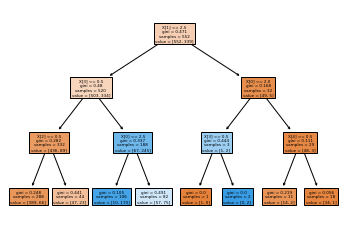

In [118]:
from sklearn import tree

tree.plot_tree(foret_decisions_model.fit(X_entrainement, Y_entrainement).estimators_[0], filled = True) 

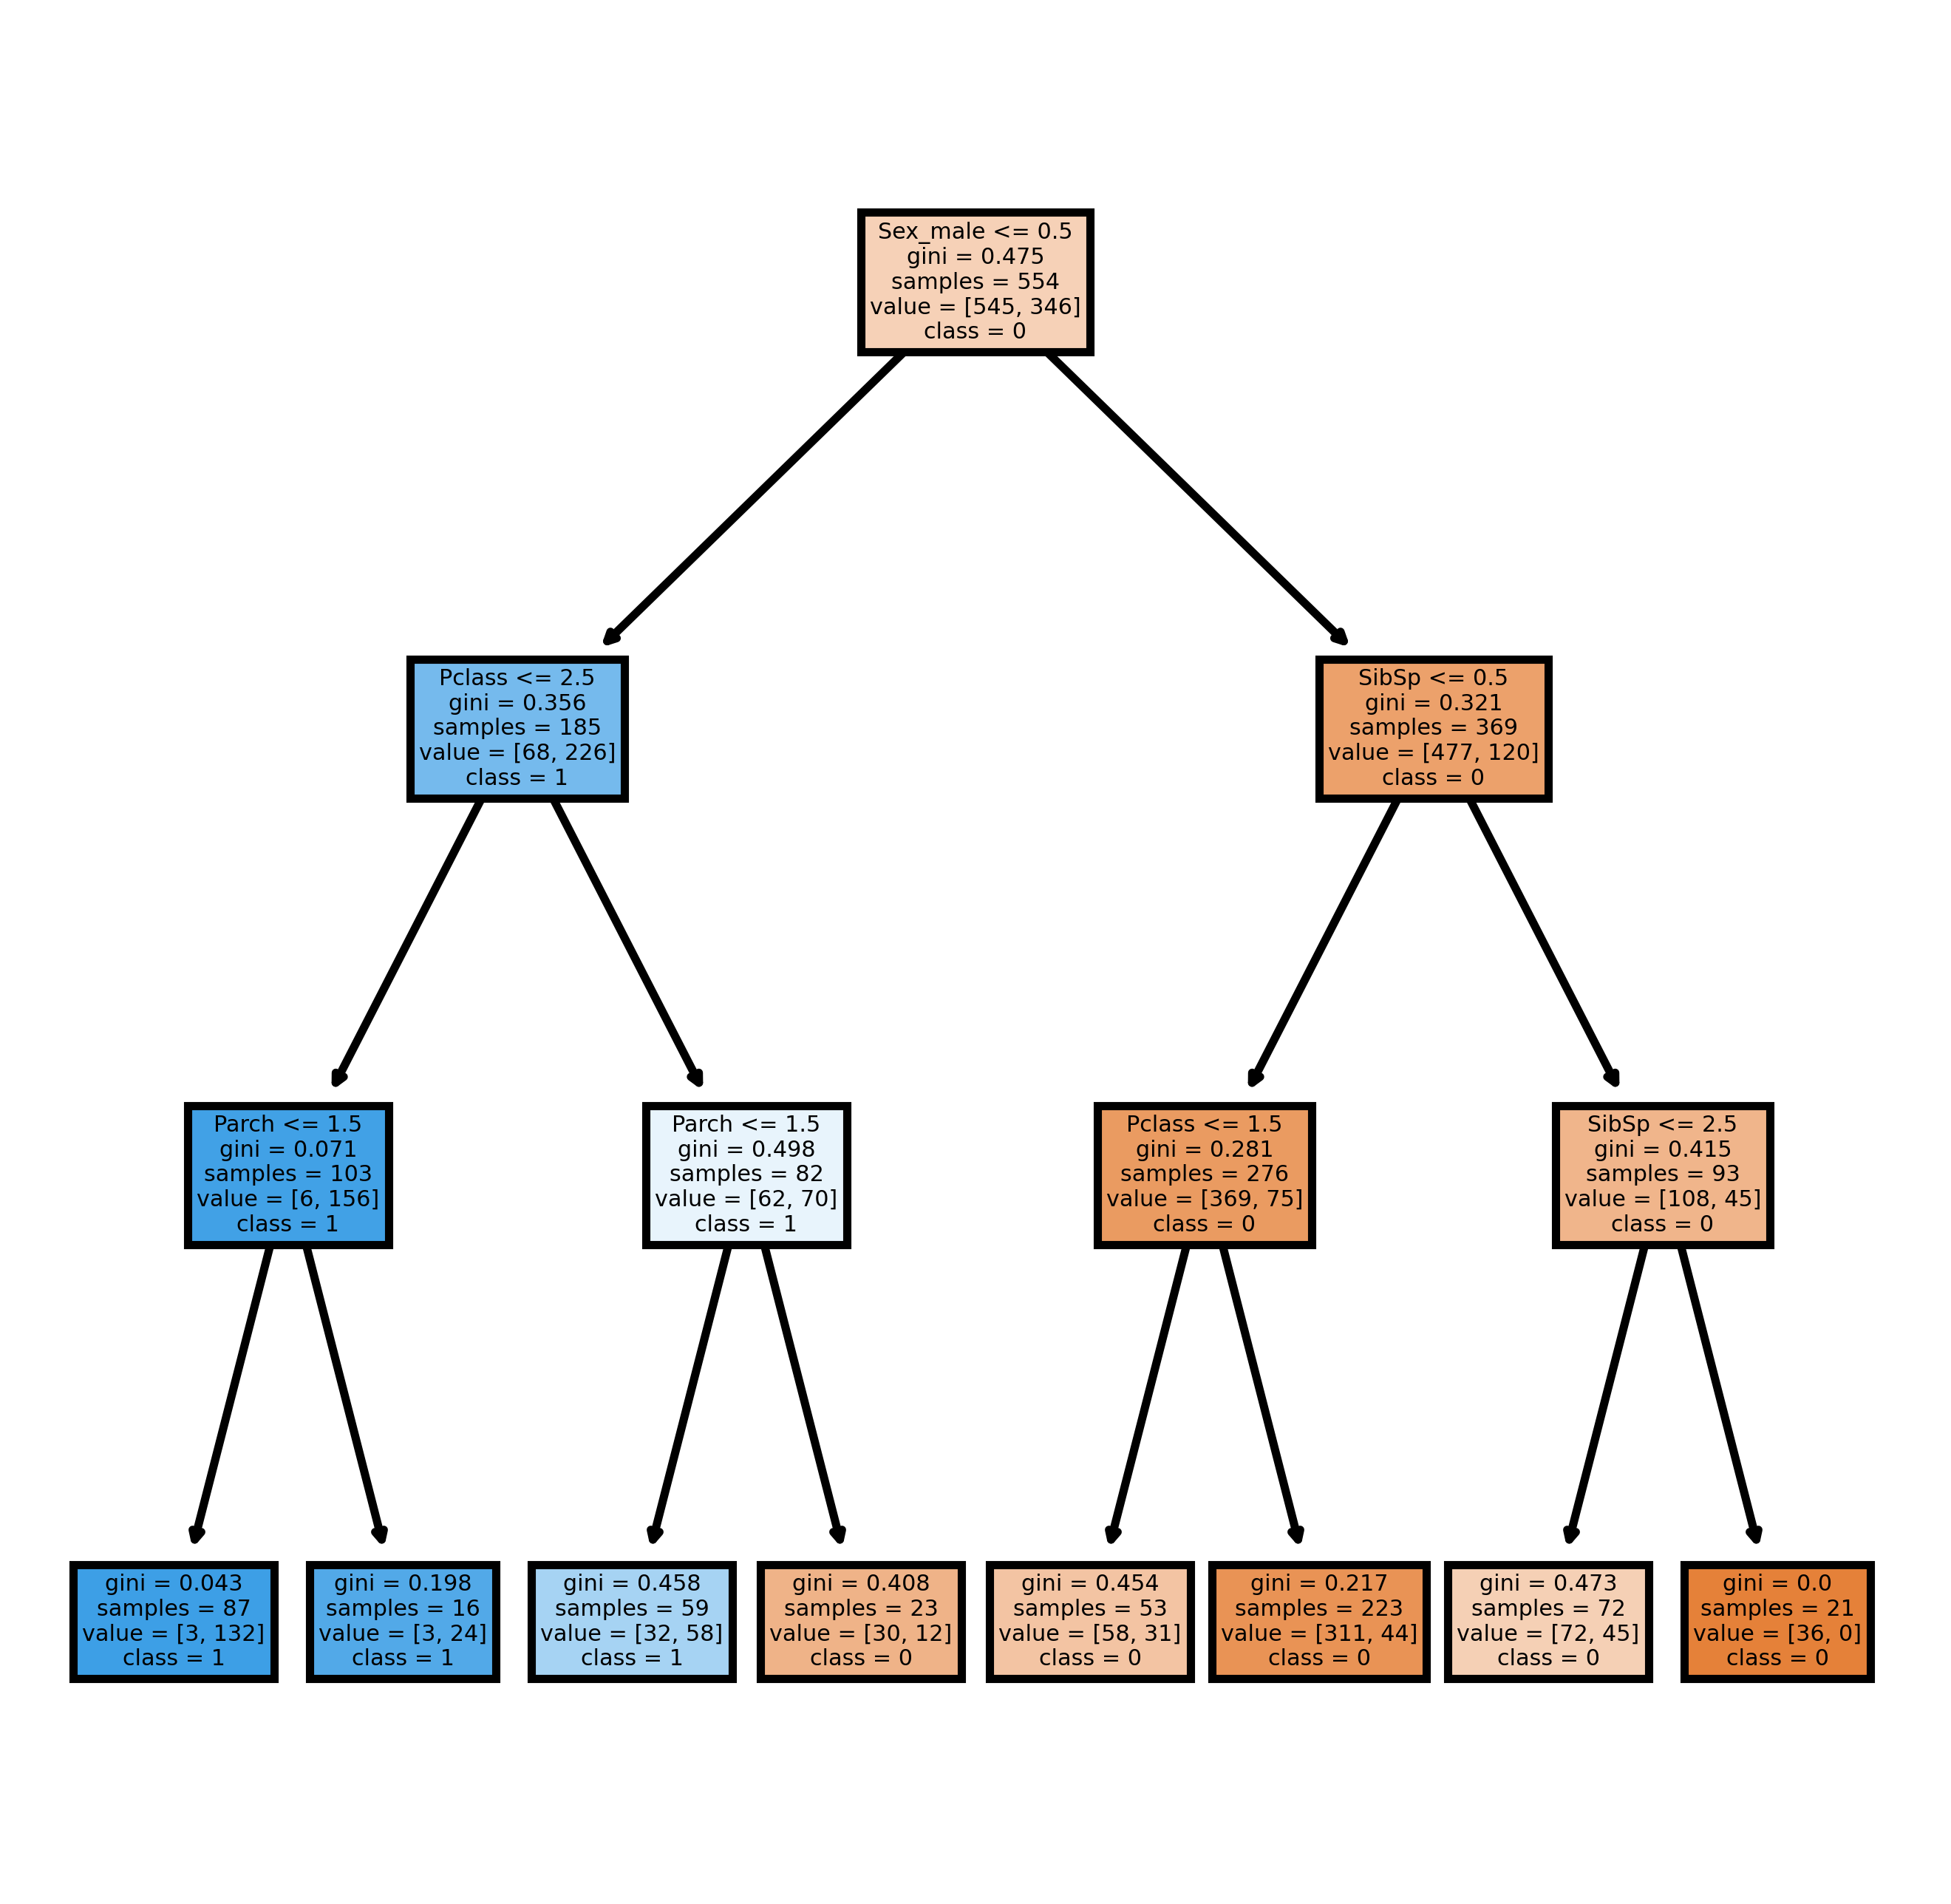

In [115]:
# Import de mat
import matplotlib.pyplot as plt
from sklearn import tree

liste_classes_entiers = list(map(int, list(foret_decisions_model.classes_)))
liste_classes = list(map(str, list(liste_classes_entiers)))

liste_noms_features = list(X_entrainement.columns.values)
liste_nom_classes = liste_classes
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(foret_decisions_model.estimators_[0],
               feature_names = liste_noms_features, 
               class_names = liste_nom_classes,
               filled = True);
# fig.savefig('tmp_individualtree.png')

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(entrainement_df[liste_features]), Y_entrainement, test_size=0.2)


foret_decisions_2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 1)
foret_decisions_2.fit(x_train, y_train)
modele_predictions = foret_decisions_2.predict(X_test)

acc_random_forest = round(foret_decisions.score(x_train, y_train) * 100, 2)
print(acc_random_forest)

81.6


In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

display(df.head())

data.target_names

ValueError: Shape of passed values is (569, 30), indices imply (569, 2)

In [121]:
from sklearn.model_selection import validation_curve

k = np.arange(1, 2)
train_score, val_score = validation_curve(RandomForestClassifier(), X_entrainement, Y_entrainement, param_range = k, param_name = "max_depth", cv=5)

display(train_score.flatten())

data = pd.DataFrame(np.array([train_score.flatten()]))


array([0.78230337, 0.7826087 , 0.78681627, 0.79523142, 0.78681627])

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [94]:
from urllib import request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


request.urlretrieve ("https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/decouvrez-les-librairies-python-pour-la-data-science/hubble_data.csv", "be.csv")
hubble = pd.read_csv("ble.csv")

from sklearn.linear_model import LinearRegression

X = hubble.distance.values.reshape(-1,1)
Y = hubble.recession_velocity
lr = LinearRegression()
lr.fit(X, Y)

Y_test = np.array([.032, 1.5, 2.0, .6]).reshape(-1, 1)
y_predict = lr.predict(Y_test)

display(np.array([15, 20, 60]))
display(np.array([15, 20, 60]).reshape(-1, 1))

print(lr.coef_) # a de ax + b
print(lr.intercept_) # b de ax +b 

display(type(Y_test))
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE) # taille de texte par défaut
plt.rc('axes', titlesize=BIGGER_SIZE) # taille des titres des axes
plt.rc('axes', labelsize=BIGGER_SIZE) # taille des labels des axes
plt.rc('xtick', labelsize=BIGGER_SIZE) # taille des ticks des ascisses

plt.rc('ytick', labelsize=BIGGER_SIZE) # taille des ticks des ordonnées
plt.rc('legend', fontsize=BIGGER_SIZE) # taille de la légende
plt.rc('figure', titlesize=BIGGER_SIZE) # taille du titre
plt.figure()
plt.title("Données de Hubble")
plt.scatter(X, Y, color='black', label="données")
plt.plot(X, lr.predict(X), color='red', linewidth=3, label="prédiction")
plt.xlabel("Distance")
plt.ylabel("Vitesse de récession")
plt.legend()
plt.show()

display(Y_test)
display(y_predict)
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_predict})
df

#pd.DataFrame({
 #   "Feature":hubble.columns.tolist(), "Coefficients" :lr.coef_[0]
#})


FileNotFoundError: [Errno 2] No such file or directory: 'ble.csv'